In [1]:
import numpy as np
import pandas as pd

# Getting Prefix-Sufix  ( PS) list

In [2]:
def RegenerateHappyDict():

    prefixes = pd.read_csv("csv/prefixes.csv")
    suffixes = pd.read_csv("csv/suffixes.csv")

    prefixes.columns = ["ps", "length", "family_size", "summed_freq"]
    suffixes.columns = ["ps", "length", "family_size", "summed_freq"]

    s = list(suffixes.ps.map(lambda x: x.replace(">", "")))
    p = list(prefixes.ps.map(lambda x: x.replace("<", "")))

    ps = []

    for el in s:
        ps.append(el)

    for el in p:
        ps.append(el)

    # creating of dictionary for counting prefix-suffix connections 
    happy_dict = {}

    for i in range(len(ps) - 1):

        for j in range(i + 1, len(ps)):
    #         print((ps[i],ps[j]))

            happy_dict[(ps[i],ps[j])] = 0
    return happy_dict

In [118]:
happy_dict = RegenerateHappyDict()

In [119]:
("tres", "su") in happy_dict.keys()

False

In [120]:
("su", "tres") in happy_dict.keys()

True

In [121]:
happy_dict[("su", "tres")]

0

In [97]:
def dictToDataFrame(dictt):
    aux = pd.DataFrame.from_dict(dictt.items())
    aux["first"] = aux.iloc[:,0].map(lambda x: x[0])
    aux["second"] = aux.iloc[:,0].map(lambda x: x[1])
    aux.columns = ["ps", "count", "first", "second"]
    aux = aux.loc[:, ["first", "second" ,"count"]]
    return aux


In [122]:
dictToDataFrame(happy_dict).head()

,first,second,count
0,isme,aire,0
1,isme,ment,0
2,isme,age,0
3,isme,oir,0
4,isme,aye,0


In [ ]:
# 0

In [22]:
df = pd.read_csv("csv/0_1_1.csv", index_col = 0).reset_index(drop=True)

In [23]:
df.head()

,item,freq,canon_segm,prs,ROOT_1_FamSize,ROOT_1_Freq,ROOT_1_Length,ROOT_1_PFMF,SUFF_1_FamSize,SUFF_1_Freq,SUFF_1_Length,SUFF_1_PFMF,n_morphemes
0,racisme,2.09,(race)>isme>,"(0, 1, 1)",4,43.53,4,75.000000,91,100.85,4,15.384615,2
1,stagiaire,3.29,(stage)>aire>,"(0, 1, 1)",2,8.16,5,50.000000,179,853.76,4,31.284916,2
2,abattage,0.63,(abattre)>age>,"(0, 1, 1)",3,3.95,7,33.333333,201,707.48,3,54.228856,2
3,abattement,0.17,(abattre)>ment>,"(0, 1, 1)",3,3.95,7,66.666667,919,5042.81,4,71.708379,2
4,abattoir,3.15,(abattre)>oir>,"(0, 1, 1)",3,3.95,7,0.000000,28,113.06,3,28.571429,2


In [101]:

def goodPSListCreation(prefixes, suffixes):
    ps = []
    for el in prefixes:
        if el != '':
            ps.append(el)
    for el in suffixes:
        if el != '':
            ps.append(el)
    return ps


    
def withinWordAdditionToHappyDict(df, happy_dict):
    
    for r in range(df.shape[0]):
#         print(r)
        pre = df.canon_segm[r].split("(")[0].split("<")
        suff = df.canon_segm[r].split(")")
        suf = suff[len(suff) - 1].split(">")
        
#         print(pre, suf)
        ps = goodPSListCreation(pre, suf)
#         print("PS: " , ps)
        addToHappyDict(happy_dict, ps)
    
def addToHappyDict(dicttt, ps):
    happy_keys = dicttt.keys()
    for i in range(len(ps) - 1):
        for j in range(i + 1, len(ps)):
            if (ps[i],ps[j]) in happy_keys:
                happy_dict[(ps[i],ps[j])] = happy_dict[(ps[i],ps[j])] + 1
            else:
                happy_dict[(ps[j],ps[i])] = happy_dict[(ps[j],ps[i])] + 1
    

In [3]:
# files
files = [
    '0_1_0.csv',
    '0_1_1.csv',
    '0_1_2.csv',
'0_1_3.csv',
'0_2_0.csv',
'0_2_2.csv',
'0_3_0.csv',
'1_1_0.csv',
'1_1_1.csv',
'1_1_2.csv',
'1_1_3.csv',
'1_2_0.csv',
'1_2_1.csv',
'2_1_0.csv',
'2_1_1.csv',
'2_1_2.csv']

paths = ["csv/" + el for el in files]



In [176]:
paths

['csv/0_1_0.csv',
 'csv/0_1_1.csv',
 'csv/0_1_2.csv',
 'csv/0_1_3.csv',
 'csv/0_2_0.csv',
 'csv/0_2_2.csv',
 'csv/0_3_0.csv',
 'csv/1_1_0.csv',
 'csv/1_1_1.csv',
 'csv/1_1_2.csv',
 'csv/1_1_3.csv',
 'csv/1_2_0.csv',
 'csv/1_2_1.csv',
 'csv/2_1_0.csv',
 'csv/2_1_1.csv',
 'csv/2_1_2.csv']

In [108]:



def superHiperCombajn(paths, happy_dict):
    
    for path in paths:
        df = pd.read_csv(path, index_col = 0).reset_index(drop=True)
        withinWordAdditionToHappyDict(df, happy_dict)

In [109]:
happy_dict = RegenerateHappyDict()
superHiperCombajn(paths, happy_dict)



In [179]:

happy_dict





{('isme', 'aire'): 0,
 ('isme', 'ment'): 0,
 ('isme', 'age'): 0,
 ('isme', 'oir'): 0,
 ('isme', 'aye'): 0,
 ('isme', 'ion'): 1,
 ('isme', 'able'): 0,
 ('isme', 'ant/ent'): 0,
 ('isme', 'eur'): 1,
 ('isme', 'nce'): 0,
 ('isme', 'ique'): 1,
 ('isme', 'ité'): 0,
 ('isme', 'enda'): 0,
 ('isme', 'il'): 1,
 ('isme', 'ium'): 0,
 ('isme', 'al'): 6,
 ('isme', 'é'): 0,
 ('isme', 'i'): 0,
 ('isme', 'is'): 0,
 ('isme', 'elle'): 0,
 ('isme', 'rium'): 0,
 ('isme', 'esque'): 0,
 ('isme', 'ade'): 0,
 ('isme', 'eau'): 0,
 ('isme', 'er'): 0,
 ('isme', 'et'): 0,
 ('isme', 'ada'): 0,
 ('isme', 'ie'): 0,
 ('isme', 'ure'): 0,
 ('isme', 'ite'): 0,
 ('isme', 'an'): 0,
 ('isme', 'ail'): 0,
 ('isme', 'mat'): 0,
 ('isme', 'ice'): 0,
 ('isme', 'ette'): 0,
 ('isme', 'erine'): 0,
 ('isme', 'ot'): 1,
 ('isme', 'uchon'): 0,
 ('isme', 'uch'): 0,
 ('isme', 'on'): 0,
 ('isme', 'ole'): 0,
 ('isme', 'oul'): 0,
 ('isme', 'ère'): 0,
 ('isme', 'aille'): 0,
 ('isme', 'ène'): 0,
 ('isme', 'ard'): 0,
 ('isme', 'ou'): 0,
 ('isme

In [173]:
df = pd.read_csv("csv/0_1_1.csv", index_col = 0).reset_index(drop=True)

In [4]:
# Concatenating all dfs:

df_output = pd.DataFrame()

for path in paths:
    df = pd.read_csv(path, index_col = 0).reset_index(drop=True)
    df_output = pd.concat([df_output, df], ignore_index=True, sort=False)


In [93]:
def produceDFoutput(paths):
    df_output = pd.DataFrame()

    for path in paths:
        df = pd.read_csv(path, index_col = 0).reset_index(drop=True)
        df_output = pd.concat([df_output, df], ignore_index=True, sort=False)
    return df_output

In [5]:
df_output.shape

(15954, 37)

In [8]:
prs = df_output.canon_segm

prs

0                          (abricot)
1                              (ego)
2                              (fan)
3                             (foot)
4                           (ghetto)
                    ...             
15949     <re<<a<(frais)>[VB]>>ment>
15950      <re<<a<(lent)>[VB]>>ment>
15951    <dé<<con<(tenir)>nce>>[VB]>
15952       <dé<<in<(tox)>ique>>ion>
15953     <re<<a<(frais)>[VB]>>sant>
Name: canon_segm, Length: 15954, dtype: object

In [41]:
import re

firstRoot = prs.map(lambda x: re.search(r'\(([^()]+)\)',x).group(1))

secondRoot = prs.map(lambda x: re.sub(r'\(([^()]+)\)', x ," hello"))

In [39]:
firstRoot

0        abricot
1            ego
2            fan
3           foot
4         ghetto
          ...   
15949      frais
15950       lent
15951      tenir
15952        tox
15953      frais
Name: canon_segm, Length: 15954, dtype: object

In [174]:
df

,item,freq,canon_segm,prs,ROOT_1_FamSize,ROOT_1_Freq,ROOT_1_Length,ROOT_1_PFMF,SUFF_1_FamSize,SUFF_1_Freq,SUFF_1_Length,SUFF_1_PFMF,n_morphemes
0,racisme,2.09,(race)>isme>,"(0, 1, 1)",4,43.53,4,75.000000,91,100.85,4,15.384615,2
1,stagiaire,3.29,(stage)>aire>,"(0, 1, 1)",2,8.16,5,50.000000,179,853.76,4,31.284916,2
2,abattage,0.63,(abattre)>age>,"(0, 1, 1)",3,3.95,7,33.333333,201,707.48,3,54.228856,2
3,abattement,0.17,(abattre)>ment>,"(0, 1, 1)",3,3.95,7,66.666667,919,5042.81,4,71.708379,2
4,abattoir,3.15,(abattre)>oir>,"(0, 1, 1)",3,3.95,7,0.000000,28,113.06,3,28.571429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5957,vulgairement,0.40,(vulgaire)>ment>,"(0, 1, 1)",3,14.12,8,66.666667,919,5042.81,4,60.065288,2
5958,zébra,0.16,(zébr)>[VB]>,"(0, 1, 1)",2,0.19,4,0.000000,1600,25208.97,2,71.000000,2
5959,zélé,0.69,(zèle)>[VB]>,"(0, 1, 1)",2,5.61,4,50.000000,1600,25208.97,2,56.812500,2
5960,zigzaguant,0.14,(zigzag)>[VB]>,"(0, 1, 1)",2,0.55,6,50.000000,1600,25208.97,2,72.562500,2


In [58]:

roots = pd.read_csv("csv/roots.csv")


roots

,Unnamed: 0,length,family_size,summed_freq
0,(abricot),7,1,1.32
1,(ego),3,1,4.16
2,(fan),3,3,26.60
3,(foot),4,1,24.18
4,(ghetto),6,1,5.41
...,...,...,...,...
7629,(vouvoyer),8,1,0.29
7630,(vrille),6,1,0.67
7631,(zèbre),5,1,3.84
7632,(zyeuter),7,1,0.12


In [49]:
df = pd.read_csv("csv/1_2_1.csv", index_col = 0)

In [54]:
prs = df.canon_segm[27702]

prs

'<in<(vrai)(sembler)>able>'

In [57]:
# roots
prs.replace("<", "").replace(">", "")

sth = prs.split("(")

for el in sth:
    
    if ')' in el:
        print(el.split(")")[0])
    
    
# prs  - copied

vrai
sembler


In [115]:

def goodPSListCreation(prefixes, suffixes):
    ps = []
    for el in prefixes:
        if el != '':
            ps.append(el)
    for el in suffixes:
        if el != '':
            ps.append(el)
    return ps

def goodRootListCreation(SGR):
    roots = []
    SGR.replace("<", "").replace(">", "")
    sth = SGR.split("(")
    for el in sth:
    
        if ')' in el:
            
            roots.append(el.split(")")[0])
    return roots


def addToUnhappyDict(unhappy_dict, roots, ps):
    
    # todo
    for root in roots:
        for el in ps:
            if root in unhappy_dict.keys():
                unhappy_dict[root].append(el)
    
def withinWordAdditionToUnhappyDict(df, unhappy_dict):
    
    for r in range(df.shape[0]):
#         print(r)
        pre = df.canon_segm[r].split("(")[0].split("<")
        suff = df.canon_segm[r].split(")")
        suf = suff[len(suff) - 1].split(">")
        
        ps = goodPSListCreation(pre, suf)
        roots = goodRootListCreation(df.canon_segm[r])
        
#         print(roots)
        
        addToUnhappyDict(unhappy_dict, roots, ps)
    return unhappy_dict

In [80]:
def RegenerateUnhappyDict():
    roots = pd.read_csv("csv/roots.csv")
    roots.columns = ["word", "length", "fs", "sf"]
    roots.word = roots.word.map(lambda x: x.replace("(", "").replace(")", ""))
    unhappy_dict = {}

    for w in list(roots.word):
        
        if (not "(" in w) and (not ")" in w):
            unhappy_dict[w] = list()
    return unhappy_dict

In [88]:
unhappy_dict = RegenerateUnhappyDict()

In [89]:
withinWordAdditionToUnhappyDict(df_output, unhappy_dict)

In [90]:
unhappy_dict

{'abricot': [],
 'ego': [],
 'fan': ['ique', 'isme'],
 'foot': [],
 'ghetto': [],
 'golden': [],
 'gore': [],
 'jazz': [],
 'jeep': [],
 'jet': ['[VB]'],
 'jockey': [],
 'maestro': [],
 'maharajah': [],
 'manager': [],
 'race': ['isme', 'al', 'iste'],
 'reporter': [],
 'sexy': [],
 'stage': ['aire'],
 'thermo': ['ique', 'al', 'hypo', 'ie'],
 'tournois': [],
 'baisser': ['a', 'ab', 'ment', 'a', 'ant/ent', 're', 'a'],
 'abandon': ['[VB]'],
 'abattre': ['age', 'ment', 'oir'],
 'abbé': ['aye'],
 'abcès': [],
 'abdomen': [],
 'abdo': [],
 'abeille': [],
 'aberr': ['ion', 'ant/ent'],
 'abject': ['ion'],
 'ablat': ['ion'],
 'ablut': ['ion'],
 'aboyer': ['ment'],
 'aboi': ['eur', 'ment', '[VB]'],
 'abominer': ['able', 'ion'],
 'abonder': ['ant/ent', 'nce', 'ant/ent', 'ment', 'sur', 'nce'],
 'bord': ['[VB]',
  'ure',
  'a',
  're',
  'tri',
  'a',
  'age',
  'a',
  '[VB]',
  'dé',
  '[VB]',
  'dé',
  'ant/ent',
  'dé',
  'ment',
  'trans',
  '[VB]'],
 'abracadabra': [],
 'abri': ['[VB]'],
 'abr

In [123]:
def addUnhappyDictToHappyDict(happy_dict, unhappy_dict):
    
    happy_keys = happy_dict.keys()
    
    for key in unhappy_dict.keys():
        
        ps = unhappy_dict[key]
        
        if len(ps) <= 1:
            continue
        
        # else, there are prefixes-suffixes to be linked together within happy_dict, as they have common root
        
        for el in ps:
            for i in range(len(ps) - 1):
                for j in range(i + 1, len(ps)):
                    
                    if ps[i] == ps[j]:
                        continue
                    
                    if (ps[i],ps[j]) in happy_keys:
                        happy_dict[(ps[i],ps[j])] = happy_dict[(ps[i],ps[j])] + 1
                    else:
                        happy_dict[(ps[j],ps[i])] = happy_dict[(ps[j],ps[i])] + 1
        
        
        
        
        
    
    

In [118]:

def almightyCombajn2(paths):
    unhappy_dict = RegenerateUnhappyDict()
    df_output = produceDFoutput(paths)
    withinWordAdditionToUnhappyDict(df_output, unhappy_dict)
    return unhappy_dict


In [124]:
happy_dict = RegenerateHappyDict()
superHiperCombajn(paths, happy_dict)
unhappy_dict = almightyCombajn2(paths)

addUnhappyDictToHappyDict(happy_dict, unhappy_dict)


In [125]:
happy_dict

{('isme', 'aire'): 40,
 ('isme', 'ment'): 361,
 ('isme', 'age'): 167,
 ('isme', 'oir'): 0,
 ('isme', 'aye'): 0,
 ('isme', 'ion'): 427,
 ('isme', 'able'): 72,
 ('isme', 'ant/ent'): 97,
 ('isme', 'eur'): 176,
 ('isme', 'nce'): 19,
 ('isme', 'ique'): 182,
 ('isme', 'ité'): 321,
 ('isme', 'enda'): 0,
 ('isme', 'il'): 17,
 ('isme', 'ium'): 0,
 ('isme', 'al'): 371,
 ('isme', 'é'): 55,
 ('isme', 'i'): 0,
 ('isme', 'is'): 42,
 ('isme', 'elle'): 42,
 ('isme', 'rium'): 0,
 ('isme', 'esque'): 0,
 ('isme', 'ade'): 0,
 ('isme', 'eau'): 0,
 ('isme', 'er'): 0,
 ('isme', 'et'): 42,
 ('isme', 'ada'): 0,
 ('isme', 'ie'): 12,
 ('isme', 'ure'): 84,
 ('isme', 'ite'): 4,
 ('isme', 'an'): 0,
 ('isme', 'ail'): 0,
 ('isme', 'mat'): 0,
 ('isme', 'ice'): 0,
 ('isme', 'ette'): 10,
 ('isme', 'erine'): 0,
 ('isme', 'ot'): 27,
 ('isme', 'uchon'): 0,
 ('isme', 'uch'): 0,
 ('isme', 'on'): 42,
 ('isme', 'ole'): 0,
 ('isme', 'oul'): 0,
 ('isme', 'ère'): 3,
 ('isme', 'aille'): 0,
 ('isme', 'ène'): 0,
 ('isme', 'ard'): 0,

In [126]:
data = dictToDataFrame(happy_dict)

In [127]:
data.head()

,first,second,count
0,isme,aire,40
1,isme,ment,361
2,isme,age,167
3,isme,oir,0
4,isme,aye,0


In [130]:
data.to_csv("data.csv")

In [2]:
data = pd.read_csv("data.csv", index_col = 0)

In [5]:
data.head(10)

,first,second,count
0,isme,aire,40
1,isme,ment,361
2,isme,age,167
3,isme,oir,0
4,isme,aye,0
5,isme,ion,427
6,isme,able,72
7,isme,ant/ent,97
8,isme,eur,176
9,isme,nce,19


In [137]:
data.shape

(55835, 3)

In [138]:
data[data["count"] > 0 ].shape # n of edges

(3644, 3)

In [142]:
data["count"].mean()

9.979600608937046

In [144]:
data["count"].max()

8337

In [3]:
data = data[data["count"] > 0 ]

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

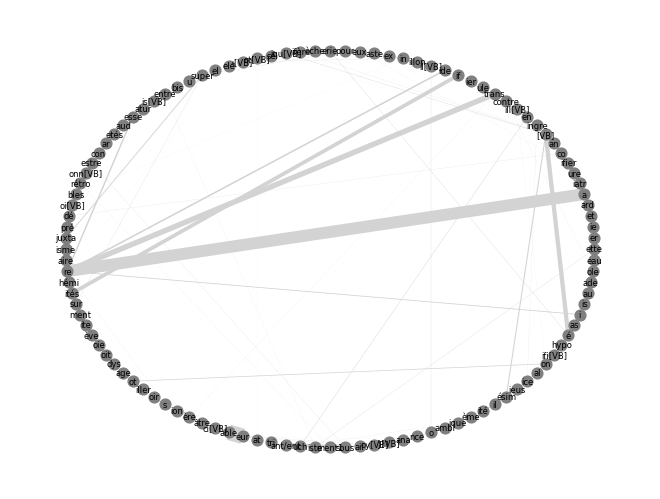

In [315]:
G = nx.from_pandas_edgelist(data.iloc[np.linspace(0, 3643, 100),:], 'first', 'second', edge_attr='count')

widths = list(nx.get_edge_attributes(G,'count').values())

nx.draw_shell(G, with_labels=True, arrowsize = 0.2, node_size = 60, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray", width = [w / 200 for w in widths])


plt.show()

In [13]:

class PageRankGraph:
    def __init__(self, G: nx.Graph, d:float=0.55, it:int =2000): # d = 0.55, an arbitrary hyperparameter
        self.d = d
        self.it = it
        self.G = G
        
        aux = nx.linalg.adjacency_matrix(G).todense()
        self.A = aux / aux.sum(axis=1)
        self.PR = np.ones(len(G.nodes)).reshape(1, -1)
    def update_pageRank(self):
        self.PR =  self.PR @ self.A
        self.PR = self.PR/self.PR.sum()
        self.PR = self.d/len(self.PR) + (1-self.d)*self.PR
    def get_pageRank(self):
        for i in range(self.it):
            self.update_pageRank()
        return np.array(self.PR).reshape(-1)

In [302]:
pagerank = PageRankGraph(G).get_pageRank()
pagerank

C:\Users\patry\AppData\Local\Temp\ipykernel_18076\487801657.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  aux = nx.linalg.adjacency_matrix(G).todense()


array([0.55381127, 0.55534581, 0.57665833, 0.55268771, 0.55268661,
       0.55236143, 0.56997357, 0.55082671, 0.55082671, 0.55082671,
       0.55082671, 0.55082671, 0.55800674, 0.55269628, 0.55134893,
       0.55201056, 0.55446797, 0.56000122, 0.55269896, 0.55135375,
       0.55135375, 0.55683511, 0.56732484, 0.55534942, 0.5513461 ,
       0.55671817, 0.5570216 , 0.5570216 , 0.55501267, 0.55501267,
       0.55082287, 0.55082287, 0.55082287, 0.55082287, 0.55601953,
       0.55601953, 0.55201619, 0.55534987, 0.55201376, 0.55800621,
       0.55336508, 0.55187227, 0.55134893, 0.5560099 , 0.5593444 ,
       0.55735479, 0.55135216, 0.55135216, 0.55852036, 0.55135017,
       0.55046467, 0.55401786, 0.55401786, 0.55201615, 0.55600988,
       0.55201376, 0.55534987, 0.55202339, 0.55800679, 0.55401949,
       0.55601227, 0.55247361, 0.55202339, 0.55335146, 0.55401543,
       0.55536276, 0.55052334, 0.5773064 , 0.55201615, 0.55134655,
       0.55134735, 0.55336026, 0.55646729, 0.55201616, 0.55268

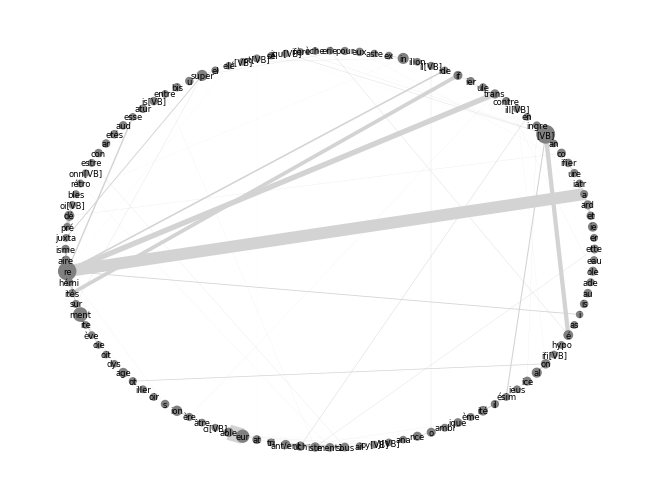

In [316]:
nx.draw_shell(G, with_labels=True, node_size=(pagerank**44)*5000000000000, width = [w / 200 for w in widths], arrowsize = 0.02, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray")


In [258]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[('[VB]', 216),
 ('ment', 186),
 ('ant/ent', 164),
 ('eur', 148),
 ('ion', 139),
 ('re', 137),
 ('in', 130),
 ('dé', 130),
 ('ité', 118),
 ('a', 116)]

In [232]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Whole network analysis

In [317]:
G = nx.from_pandas_edgelist(data, 'first', 'second', edge_attr='count')


In [260]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[('[VB]', 17),
 ('re', 16),
 ('ment', 15),
 ('ant/ent', 13),
 ('in', 13),
 ('al', 11),
 ('ion', 11),
 ('eur', 11),
 ('en', 11),
 ('ité', 10)]

In [237]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [241]:
nx.number_connected_components(G)

2

In [14]:
pagerank = PageRankGraph(G2).get_pageRank()
pagerank

C:\Users\patry\AppData\Local\Temp\ipykernel_20656\487801657.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  aux = nx.linalg.adjacency_matrix(G).todense()


array([0.55529233, 0.5562119 , 0.57470333, 0.55647136, 0.56494649,
       0.55631415, 0.56614337, 0.56488846, 0.55600106, 0.56337963,
       0.5598933 , 0.55151537, 0.56172863, 0.55779225, 0.5519829 ,
       0.55181536, 0.55544487, 0.55416959, 0.55635525, 0.55106784,
       0.557242  , 0.55242077, 0.55489076, 0.55259772, 0.55287789,
       0.55158249, 0.55315912, 0.5609093 , 0.55386977, 0.55222635,
       0.55695738, 0.55181729, 0.55148418, 0.58326936, 0.55086085,
       0.55215322, 0.55074279, 0.56287383, 0.55181277, 0.55347879,
       0.55094876, 0.55637601, 0.5505408 , 0.5505408 , 0.5505408 ,
       0.55606358, 0.55162113, 0.55083071, 0.5505739 , 0.5505739 ,
       0.55035032, 0.55156784, 0.55109653, 0.55781564, 0.55124053,
       0.55023278, 0.55009604, 0.5500776 , 0.55058966, 0.55669927,
       0.5502402 , 0.55072746, 0.55072119, 0.55377273, 0.56070343,
       0.55098453, 0.55192864, 0.55270991, 0.55219662, 0.55037082,
       0.5509875 , 0.5505739 , 0.55114759, 0.55001974, 0.55018

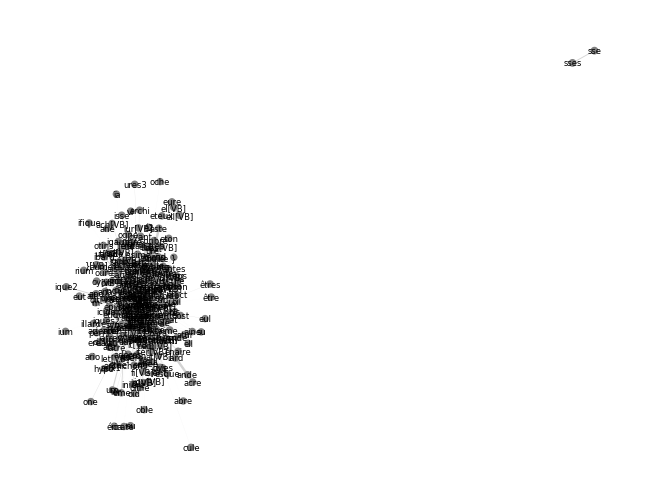

In [332]:
nx.draw(G, with_labels=True, node_size=(pagerank**44)*5000000000000, width = [w / 1000 for w in widths], arrowsize = 0.01, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray")


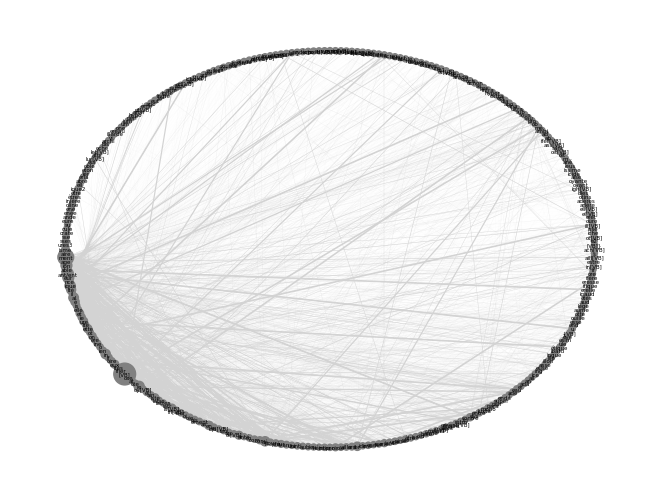

In [334]:
nx.draw_shell(G, with_labels=True, node_size=(pagerank**44)*5000000000000, width = [w / 2000 for w in widths], arrowsize = 0.01, font_size = 4, font_color = "black", node_color = "gray", edge_color = "lightgray")


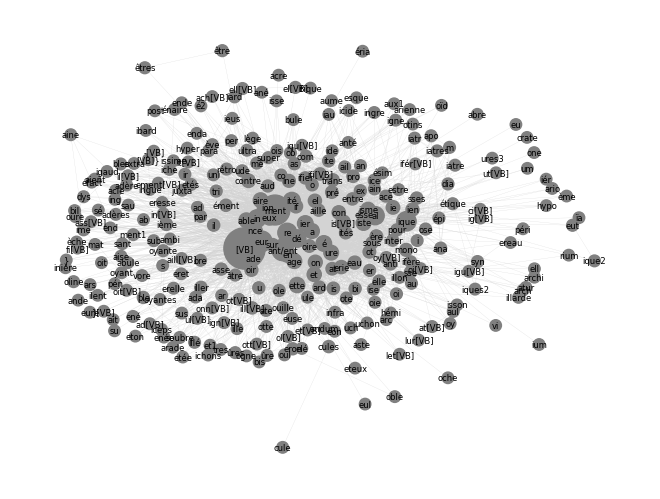

In [282]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=(pagerank**44)*18000000000000,width = 0.15, arrowsize = 0.01, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray")


In [248]:
graphs = list(nx.connected_components(G))

In [251]:
graphs[1]

{'sse', 'sses'}

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
data2 = data[data["first"] != 'sse']
data2 = data2[data2["second"] != 'sse']

data2 = data2[data2["first"] != 'sses']
data2 = data2[data2["second"] != 'sses']

In [ ]:
data2[data2["second"] == 'sses']

In [7]:
G2 = nx.from_pandas_edgelist(data2, 'first', 'second', edge_attr='count')

In [89]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G2))

In [94]:
shortest_path_lengths

{'isme': {'isme': 0,
  'ose': 1,
  'iller': 1,
  'ifi[VB]': 1,
  'inter': 1,
  'al': 1,
  'iatre': 1,
  'oire': 1,
  'is': 1,
  'et': 1,
  'au': 1,
  'iqu[VB]': 1,
  'per': 1,
  'ère': 1,
  're': 1,
  'hémi': 1,
  'é': 1,
  'elle': 1,
  'dé': 1,
  'ie': 1,
  'aire': 1,
  'sur': 1,
  'ités': 1,
  'is[VB]': 1,
  'pré': 1,
  'anté': 1,
  '[VB]': 1,
  'ion': 1,
  'ure': 1,
  'oy[VB]': 1,
  'eu': 1,
  'ain': 1,
  'oie': 1,
  'iau': 1,
  'bi': 1,
  'o': 1,
  'as': 1,
  'a': 1,
  'ant/ent': 1,
  'ément': 1,
  'if': 1,
  'oi': 1,
  'iatr': 1,
  'ique': 1,
  'able': 1,
  'ite': 1,
  'nce': 1,
  'el': 1,
  'age': 1,
  'pour': 1,
  'ité': 1,
  'oi[VB]': 1,
  'ien': 1,
  'iatres': 1,
  'iste': 1,
  'trans': 1,
  'ment': 1,
  'ifier': 1,
  'en': 1,
  'co': 1,
  'eux': 1,
  'ot': 1,
  'in': 1,
  'at': 1,
  'com': 1,
  'on': 1,
  'ote': 1,
  'eur': 1,
  'ois': 1,
  'uni': 1,
  'arc': 1,
  'ex': 1,
  'anti': 1,
  'ette': 1,
  'il': 1,
  'ine': 1,
  'con': 1,
  'er': 2,
  'ïa': 2,
  'eau': 2,
  'bis': 

# Which -fixes are the furthest?

In [102]:
funny_dict = {}

for key in shortest_path_lengths.keys():
    funny_dict[key] = 0
    
    inner_dict = shortest_path_lengths[key]
    
    for inner_key in inner_dict.keys():
        
        if inner_dict[inner_key] > 3:
            print("FIX: " + key +" , OTHER: " + inner_key + " , DISTANCE: " + str(inner_dict[inner_key]))
            funny_dict[key] = funny_dict[key] + 1


FIX: eu , OTHER: être , DISTANCE: 4
FIX: eu , OTHER: ium , DISTANCE: 4
FIX: eu , OTHER: cule , DISTANCE: 4
FIX: eu , OTHER: êtres , DISTANCE: 4
FIX: eu , OTHER: ell , DISTANCE: 4
FIX: eu , OTHER: abre , DISTANCE: 4
FIX: ende , OTHER: cule , DISTANCE: 4
FIX: iard , OTHER: cule , DISTANCE: 4
FIX: aine , OTHER: cule , DISTANCE: 4
FIX: aine , OTHER: ique2 , DISTANCE: 4
FIX: bule , OTHER: cule , DISTANCE: 4
FIX: énaire , OTHER: cule , DISTANCE: 4
FIX: enda , OTHER: cule , DISTANCE: 4
FIX: ifique , OTHER: cule , DISTANCE: 4
FIX: ach[VB] , OTHER: cule , DISTANCE: 4
FIX: é2 , OTHER: cule , DISTANCE: 4
FIX: isse , OTHER: cule , DISTANCE: 4
FIX: el[VB] , OTHER: cule , DISTANCE: 4
FIX: ell[VB] , OTHER: cule , DISTANCE: 4
FIX: otins , OTHER: cule , DISTANCE: 4
FIX: icide , OTHER: cule , DISTANCE: 4
FIX: ieus , OTHER: cule , DISTANCE: 4
FIX: ané , OTHER: cule , DISTANCE: 4
FIX: m , OTHER: cule , DISTANCE: 4
FIX: oit , OTHER: cule , DISTANCE: 4
FIX: oit[VB] , OTHER: cule , DISTANCE: 4
FIX: apo , OTH

In [103]:
funny_dict

{'isme': 0,
 'aire': 0,
 'ment': 0,
 'age': 0,
 'ion': 0,
 'able': 0,
 'ant/ent': 0,
 'eur': 0,
 'nce': 0,
 'ique': 0,
 'ité': 0,
 'il': 0,
 'al': 0,
 'é': 0,
 'is': 0,
 'elle': 0,
 'et': 0,
 'ie': 0,
 'ure': 0,
 'ite': 0,
 'ette': 0,
 'ot': 0,
 'on': 0,
 'ère': 0,
 'ine': 0,
 'o': 0,
 'ien': 0,
 'in': 0,
 'if': 0,
 'oire': 0,
 'eux': 0,
 'ités': 0,
 'ifier': 0,
 '[VB]': 0,
 'ose': 0,
 'at': 0,
 'ote': 0,
 're': 0,
 'oy[VB]': 0,
 'el': 0,
 'ain': 0,
 'iste': 0,
 'iatre': 0,
 'iatres': 0,
 'iatr': 0,
 'is[VB]': 0,
 'ifi[VB]': 0,
 'iller': 0,
 'oi': 0,
 'oie': 0,
 'ois': 0,
 'ément': 0,
 'as': 0,
 'en': 0,
 'ex': 0,
 'iqu[VB]': 0,
 'iau': 0,
 'arc': 0,
 'oi[VB]': 0,
 'a': 0,
 'anté': 0,
 'co': 0,
 'com': 0,
 'con': 0,
 'dé': 0,
 'pour': 0,
 'pré': 0,
 'sur': 0,
 'trans': 0,
 'uni': 0,
 'anti': 0,
 'au': 0,
 'bi': 0,
 'eu': 6,
 'hémi': 0,
 'inter': 0,
 'per': 0,
 'oir': 0,
 'ole': 0,
 'aille': 0,
 'ard': 0,
 'ier': 0,
 'ide': 0,
 'ime': 0,
 'ende': 1,
 'ace': 0,
 'erie': 0,
 'iard': 1,
 '

In [107]:
n_of_paths_of_4 = pd.DataFrame.from_dict(funny_dict.items())
n_of_paths_of_4.columns = ["ps", "count"]

In [108]:
n_of_paths_of_4

,ps,count
0,isme,0
1,aire,0
2,ment,0
3,age,0
4,ion,0
...,...,...
297,eure,0
298,su,0
299,cule,57
300,crate,5


In [110]:
n_of_paths_of_4.sort_values(by = ["count"], ascending = False).head(10)

,ps,count
299,cule,57
289,ique2,13
290,être,12
291,êtres,12
282,eul,9
283,oble,9
286,éria,9
270,ium,7
73,eu,6
278,oche,5


In [111]:
n_of_paths_of_4.shape # 302 distinxt ps - fixes

(302, 2)

In [114]:
funny_dict = {}

for key in shortest_path_lengths.keys():
    funny_dict[key] = 0
    
    inner_dict = shortest_path_lengths[key]
    
    for inner_key in inner_dict.keys():
        
        if inner_dict[inner_key] == 1:
            #print("FIX: " + key +" , OTHER: " + inner_key + " , DISTANCE: " + str(inner_dict[inner_key]))
            funny_dict[key] = funny_dict[key] + 1

In [115]:
n_of_paths_of_1 = pd.DataFrame.from_dict(funny_dict.items())
n_of_paths_of_1.columns = ["ps", "count"]

In [116]:
n_of_paths_of_1.sort_values(by = ["count"], ascending = False).head(10)

,ps,count
33,[VB],216
2,ment,186
6,ant/ent,164
7,eur,148
4,ion,139
37,re,137
27,in,130
64,dé,130
10,ité,118
59,a,116


In [90]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G2, sp=shortest_path_lengths).values())
diameter

4

Text(0, 0.5, 'Frequency (%)')

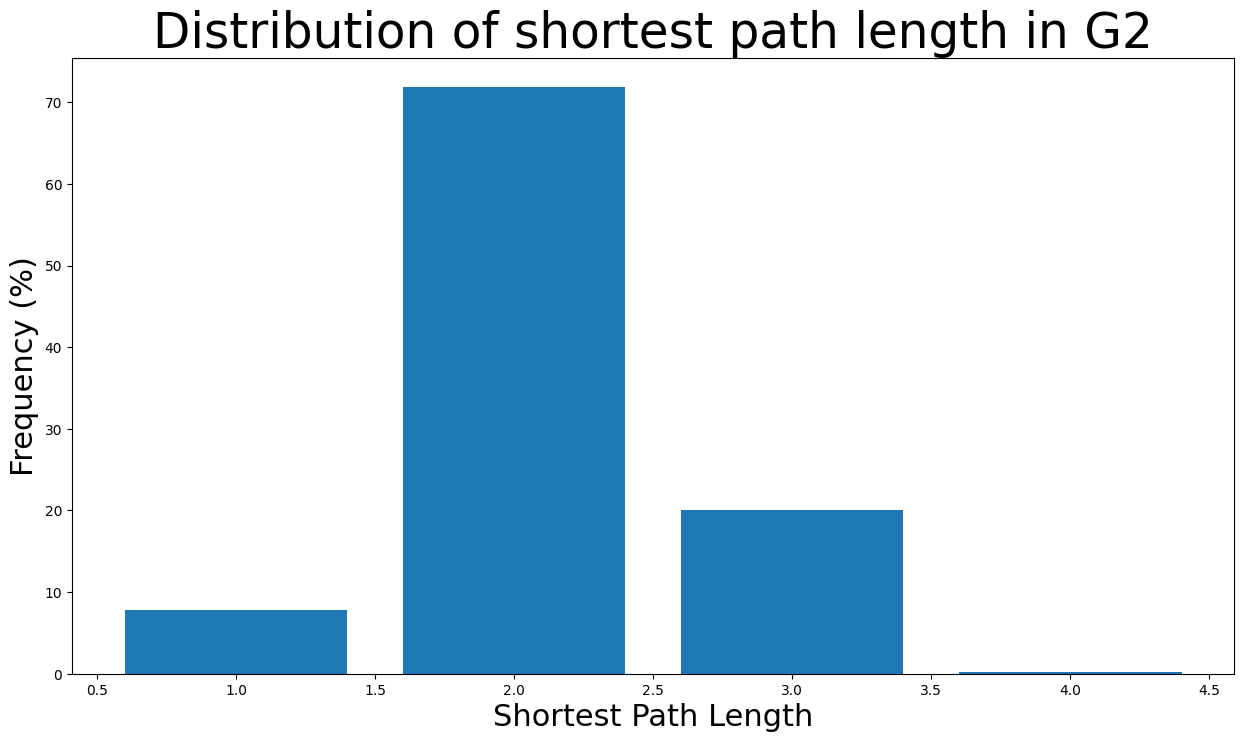

In [93]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G2', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

In [265]:
pagerank

array([0.55525753, 0.55617106, 0.57454109, 0.55642881, 0.56484831,
       0.55627264, 0.56603732, 0.56479064, 0.55596161, 0.56329174,
       0.55982829, 0.55150539, 0.56165158, 0.55774102, 0.55196984,
       0.55180341, 0.55540907, 0.55414217, 0.55631346, 0.5510608 ,
       0.55719441, 0.55240484, 0.55485859, 0.55258062, 0.55285896,
       0.55157206, 0.55313834, 0.56083761, 0.55384431, 0.55221168,
       0.55691164, 0.5518053 , 0.55147439, 0.5830509 , 0.55085517,
       0.55213904, 0.55073789, 0.56278925, 0.55180084, 0.5534559 ,
       0.55094249, 0.5563341 , 0.55053724, 0.55053724, 0.55053724,
       0.55602372, 0.55161043, 0.55082523, 0.55057011, 0.55057011,
       0.550348  , 0.55155751, 0.55108929, 0.55776427, 0.55123234,
       0.55023123, 0.5500954 , 0.55007708, 0.55058576, 0.55665521,
       0.55023861, 0.55072264, 0.55071643, 0.5537479 , 0.5606331 ,
       0.55097802, 0.55191592, 0.55269206, 0.55218215, 0.55036836,
       0.55098098, 0.55057011, 0.55114003, 0.55001961, 0.55018

In [15]:
lucky_dict = {}

i = 0
for el in G2.nodes:
    lucky_dict[el] = pagerank[i]
    
    i += 1

In [16]:
lucky_dict

{'isme': 0.555292326402903,
 'aire': 0.556211903366165,
 'ment': 0.5747033311660101,
 'age': 0.5564713623517227,
 'ion': 0.5649464874684776,
 'able': 0.5563141464075988,
 'ant/ent': 0.5661433733291532,
 'eur': 0.5648884568959542,
 'nce': 0.556001059784868,
 'ique': 0.56337962709725,
 'ité': 0.5598932991361191,
 'il': 0.5515153702314233,
 'al': 0.5617286292023522,
 'é': 0.5577922461031173,
 'is': 0.5519829003280842,
 'elle': 0.5518153638551716,
 'et': 0.5554448675045173,
 'ie': 0.5541695919462238,
 'ure': 0.5563552480108072,
 'ite': 0.5510678400519813,
 'ette': 0.5572420039216367,
 'ot': 0.5524207734433693,
 'on': 0.5548907624358397,
 'ère': 0.5525977232782449,
 'ine': 0.5528778932961173,
 'o': 0.5515824899154681,
 'ien': 0.5531591224533896,
 'in': 0.5609092982007617,
 'if': 0.5538697685156709,
 'oire': 0.552226353814111,
 'eux': 0.556957377197541,
 'ités': 0.5518172883399571,
 'ifier': 0.5514841790256165,
 '[VB]': 0.5832693565466677,
 'ose': 0.5508608472578715,
 'at': 0.552153217222437

In [17]:
df = pd.DataFrame.from_dict(lucky_dict.items())
df.columns = ['ps', "pagerank"]

In [18]:
df

,ps,pagerank
0,isme,0.555292
1,aire,0.556212
2,ment,0.574703
3,age,0.556471
4,ion,0.564946
...,...,...
297,eure,0.550007
298,su,0.550007
299,cule,0.550248
300,crate,0.550019


In [81]:
df.sort_values(by=['pagerank'], ascending=False)[0:8]

,ps,pagerank
33,[VB],0.583269
2,ment,0.574703
6,ant/ent,0.566143
4,ion,0.564946
7,eur,0.564888
9,ique,0.563380
37,re,0.562874
12,al,0.561729


In [82]:
df.sort_values(by=['pagerank'], ascending=True)[0:8]

,ps,pagerank
298,su,0.550007
297,eure,0.550007
296,ande,0.550007
143,ifique,0.550008
217,acre,0.550011
301,ures3,0.550011
272,one,0.550015
262,ïa,0.550015


In [21]:
AM = nx.linalg.adjacency_matrix(G2).todense()

C:\Users\patry\AppData\Local\Temp\ipykernel_20656\2981874663.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  AM = nx.linalg.adjacency_matrix(G2).todense()


In [22]:
AM

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [23]:
type(AM)

numpy.matrix

In [25]:
np.savetxt("AM.csv", AM)

#### Further clustering performed using R script 

(communities_detection_algorithm.R)

In [26]:
AM.shape

(302, 302)

In [40]:
clusters = pd.read_csv("clusters.csv", index_col = 0)
clusters

,x
1,15
2,15
3,15
4,15
5,15
...,...
298,16
299,1
300,15
301,13


In [47]:
clust = np.array(clusters.x)

In [56]:
clust

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15,  4, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15,  3, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  2, 15, 15, 15,
       15, 15, 15, 15, 15

In [75]:
interesting_nodes = np.array(np.where(clust != 15))
interesting_nodes

array([[ 73, 143, 217, 262, 272, 278, 282, 286, 287, 290, 291, 296, 297,
        298, 300, 301]], dtype=int64)

In [77]:

oustanding_words = []

i = 0
for el in G2.nodes:
    
    if i in interesting_nodes:
        print(el)
        oustanding_words.append(el)
    
    i += 1

eu
ifique
acre
ïa
one
oche
eul
éria
abre
être
êtres
ande
eure
su
crate
ures3


In [ ]:

# simulacre,(simuler)>acre>
# --> Ce qui n'a que l'apparence (de ce qu'il prétend être).
# --> Un simulacre de procès.

# scientifiques,(science)>ifique>
# neurones,(neuro)>one>

# suppuraient, <su<(pus)>[VB]>
# --> Laisser écouler du pus.

# sacoche,(sac)>oche>
# --> Sac à main
## BUT ALSO: ARGOT(familiar/colloquial register): facile - fastoche.

# offrande,(offre)>ande>
# propagande,(propager)>ande>
# réprimandes,(réprim)>ande>
# cafétéria, (café)>éria>
# bureaucrate,(bureau)>crate>
# paranoïa,(parano)>ïa>
# filleul,(fille)>eul>
# gageure,(gage)>eure>
# --> Action, projet, opinion qui semble relever d'un défi, d'un pari.
# --> Pari. Assorti de gages.

# i dont know why they have different suffixes:
# fioritures,(fior)>ure>
# foulures,(fouler)>ures3>
# piqûre,(piquer)>ûre>
# piqûres,(piquer)>ûres>

In [46]:
clust_list

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 4,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 3,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 1

In [79]:
coupled_two_nodes = np.array(np.where(clust == 8))
coupled_two_nodes

array([[290, 291]], dtype=int64)

In [80]:
coupled_2_words = []

i = 0
for el in G2.nodes:
    
    if i in coupled_two_nodes:
        print(el)
        coupled_2_words.append(el)
    
    i += 1

être
êtres


champêtre,(champ)>être>

champêtres,(champ)>êtres>

They were clustered together because of the same root!

In [84]:
data2[data2["second"] == 'ïa']

,first,second,count
3679,ique,ïa,2


In [85]:
data2[data2["first"] == 'ïa']

,first,second,count


In [ ]:
# désenchanteresse